<a href="https://colab.research.google.com/github/Darius2527/CreditFraud-Classifier/blob/main/CreditFraudProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=None
#this code is written to make sure that all rows in the dataset are read. Sometimes google colab may be unable to read all the rown when the number of rows is too large
chunk_size = 10000
df_list = []  # Initialize an empty list to store chunk DataFrames

for chunk in pd.read_csv("CreditFraud.csv", chunksize=chunk_size, on_bad_lines='skip'):
    df_list.append(chunk)  # Append each chunk DataFrame to the list

# Concatenate all chunk DataFrames into a single DataFrame
df = pd.concat(df_list, axis=0, ignore_index=True)

print(df.shape)  # Check the dimensions of the final DataFrame

(284807, 31)


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.isnull().sum()
#no null values present

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#drop unnecessary 'time' column
df.drop('Time', axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#let us check value count of target variable
df['Class'].value_counts()
#as we can see it is a highly inbalanced dataset

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: >

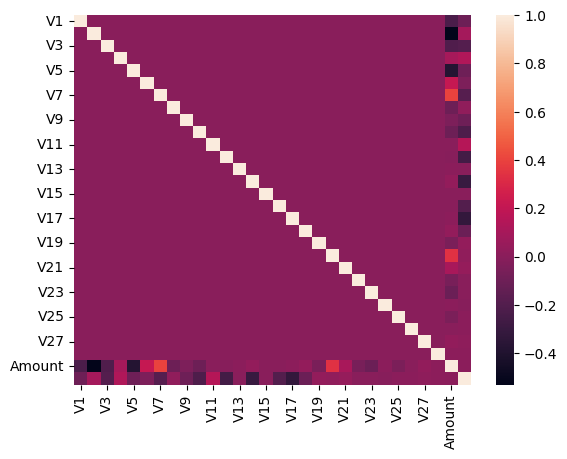

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())

In [ ]:
#seperating the features and the target
X = df.drop('Class', axis=1)
Y = df['Class']

In [ ]:
X.shape

(284807, 29)

In [ ]:
X.shape[1]

29

In [ ]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:

X

array([[-0.69424232, -0.04407492,  1.6727735 , ...,  0.33089162,
        -0.06378115,  0.24496426],
       [ 0.60849633,  0.16117592,  0.1097971 , ..., -0.02225568,
         0.04460752, -0.34247454],
       [-0.69350046, -0.81157783,  1.16946849, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 0.98002374, -0.18243372, -2.14320514, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [-0.12275539,  0.32125034,  0.46332013, ...,  0.26960398,
         0.31668678, -0.31324853],
       [-0.27233093, -0.11489898,  0.46386564, ..., -0.00598394,
         0.04134998,  0.51435531]])

In [ ]:
#splitting datast into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
#standard noramlizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_test = scaler.transform(X)

In [ ]:
#inporting the required libraries
import keras
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.models import Sequential
from keras.layers import Dropout


In [ ]:
#initializing ANN
classifier = Sequential()


In [ ]:
#adding imput layer and first hidden layer
classifier.add(Dense(units=10,kernel_initializer="he_normal",activation="relu",input_dim=X.shape[1]))
classifier.add(Dropout(0.3))
#units=output_dim: no of neurons in layer
#kernel_initializer = init : weight initializer
#activation: specify activation function
#input_dim: no of features/columns in training dataset (only used in forst dense addition)

#this creats neural network with 11 input nodes/nuerons and 6 1st hidden layer neurons

#now trying to increase neurons/units and using he_normal weight initalizer

#now adding dropout
#adding second hidden layer
classifier.add(Dense(units=20,kernel_initializer = "he_normal",activation="relu"))
classifier.add(Dropout(0.4))
#adds six nodes/nuerons in second hidden layer

#now trying to increase neurons/units and using he_normal weight initalizer

#now adding dropout
#adding third hidden layer
classifier.add(Dense(units=15,kernel_initializer = "he_normal",activation="relu"))
classifier.add(Dropout(0.2))

#added another hidden layer
#now trying to increase neurons/units and using he_normal weight initalizer

#now adding dropout
#adding output layer
classifier.add(Dense(units=1,kernel_initializer = "he_normal",activation="sigmoid"))
#1 node/neuron created as output

#no dropout here cuz output layer

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                300       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 20)                220       
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 dense_6 (Dense)             (None, 15)                315       
                                                                 
 dropout_5 (Dropout)         (None, 15)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
#compiling ANN
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
#use binary cross_entropy when output is 0 or 1
#use categorical_crossentropy when more that 2 classes present as output


In [ ]:
#fitting training set into ANN
classifier.fit(X_train,Y_train,validation_split=0.3,batch_size=25,epochs=100)

Epoch 1/100
6380/6380 [==============================] - 22s 3ms/step - loss: 0.0647 - accuracy: 0.9952 - val_loss: 0.0134 - val_accuracy: 0.9982
Epoch 2/100
6380/6380 [==============================] - 20s 3ms/step - loss: 0.0151 - accuracy: 0.9983 - val_loss: 0.0096 - val_accuracy: 0.9982
Epoch 3/100
6380/6380 [==============================] - 20s 3ms/step - loss: 0.0101 - accuracy: 0.9983 - val_loss: 0.0081 - val_accuracy: 0.9982
Epoch 4/100
6380/6380 [==============================] - 20s 3ms/step - loss: 0.0095 - accuracy: 0.9983 - val_loss: 0.0092 - val_accuracy: 0.9982
Epoch 5/100
6380/6380 [==============================] - 21s 3ms/step - loss: 0.0089 - accuracy: 0.9983 - val_loss: 0.0071 - val_accuracy: 0.9982
Epoch 6/100
6380/6380 [==============================] - 20s 3ms/step - loss: 0.0091 - accuracy: 0.9983 - val_loss: 0.0073 - val_accuracy: 0.9982
Epoch 7/100
6380/6380 [==============================] - 19s 3ms/step - loss: 0.0077 - accuracy: 0.9983 - val_loss: 0.0071 -

In [ ]:
#checking accuracy on test data
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5) #consider greater than 0.5 as true and rest as false

1781/1781 [==============================] - 2s 1ms/step


In [ ]:
Y_test.value_counts()

Class
0    56861
1      101
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,y_pred)
cm=confusion_matrix(Y_test,y_pred)
print(accuracy)
print(cm)
#model accuracy is high, but it was unable to classify any of the spam emails.
#all 101 spam emails were falsely classified as not spam

0.9982268881008391
[[56861     0]
 [  101     0]]


In [ ]:
#lets try oversampling the data to see if we get better accuracy
from imblearn.combine import SMOTETomek
from collections import Counter
os=SMOTETomek(sampling_strategy=0.75)
X_train_os,Y_train_os=os.fit_resample(X_train,Y_train)
print(Counter(Y_train))
print(Counter(Y_train_os))

Counter({0: 227454, 1: 391})
Counter({0: 227453, 1: 170589})


In [ ]:
#fitting oversampled training dataset into ANN model
classifier.fit(X_train_os,Y_train_os,validation_split=0.3,batch_size=25,epochs=100)

Epoch 1/100
11146/11146 [==============================] - 36s 3ms/step - loss: 0.1822 - accuracy: 0.9590 - val_loss: 0.2597 - val_accuracy: 0.8933
Epoch 2/100
11146/11146 [==============================] - 34s 3ms/step - loss: 0.0738 - accuracy: 0.9769 - val_loss: 0.2192 - val_accuracy: 0.9022
Epoch 3/100
11146/11146 [==============================] - 34s 3ms/step - loss: 0.0670 - accuracy: 0.9785 - val_loss: 0.1524 - val_accuracy: 0.9286
Epoch 4/100
11146/11146 [==============================] - 35s 3ms/step - loss: 0.0643 - accuracy: 0.9789 - val_loss: 0.1492 - val_accuracy: 0.9359
Epoch 5/100
11146/11146 [==============================] - 38s 3ms/step - loss: 0.0615 - accuracy: 0.9797 - val_loss: 0.1580 - val_accuracy: 0.9388
Epoch 6/100
11146/11146 [==============================] - 36s 3ms/step - loss: 0.0620 - accuracy: 0.9800 - val_loss: 0.1721 - val_accuracy: 0.9189
Epoch 7/100
11146/11146 [==============================] - 40s 4ms/step - loss: 0.0588 - accuracy: 0.9801 - val_

In [ ]:
#checking accuracy on test data
y_pred_os=classifier.predict(X_test)
y_pred_os=(y_pred_os>0.5) #consider greater than 0.5 as true and rest as false

1781/1781 [==============================] - 3s 1ms/step


In [ ]:
#checking accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
accuracy_os=accuracy_score(Y_test,y_pred_os)
cm_os=confusion_matrix(Y_test,y_pred_os)
print(accuracy_os)
print(cm_os)
#accuracy is less, but after oversampling, model was able to classify 88 out of 101 spam emails correctly.
#hence this model is better

0.9970506653558513
[[56706   155]
 [   13    88]]


In [ ]:
#Now let us create an ANN but with hyperparameter tuning using kerasTuner
!pip install keras-tuner
from tensorflow import keras
from kerastuner import RandomSearch
from keras import optimizers

In [ ]:
#creating a function to create the general model with variable hyperparameters
def build_model(hp):
  model = Sequential()
  model.add(Dense(units=hp.Int('input_units',min_value=32,max_value=512,step=32),activation='relu',input_dim=X.shape[1]))
  for i in range(hp.Int('num_layers',2,20)):
    model.add(Dense(units=hp.Int('units_'+str(i),min_value=32,max_value=512,step=32),activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
#initializing Random Search
tuner=RandomSearch(build_model,objective='val_accuracy',max_trials=5,executions_per_trial=3,directory='Projects',project_name='CreditFraud')

In [ ]:
#running random search on our inbalanced training data
tuner.search(X_train,Y_train,epochs=5,batch_size=25,validation_split=0.3)

Trial 5 Complete [00h 21m 39s]
val_accuracy: 0.9991466005643209

Best val_accuracy So Far: 0.9992343783378601
Total elapsed time: 02h 10m 39s


In [ ]:
tuner.results_summary()

Results summary
Results in Projects/CreditFraud
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
input_units: 448
num_layers: 10
units_0: 512
units_1: 320
learning_rate: 0.0001
units_2: 32
units_3: 320
units_4: 320
units_5: 384
units_6: 288
units_7: 64
units_8: 288
units_9: 384
units_10: 128
units_11: 352
Score: 0.9992343783378601

Trial 1 summary
Hyperparameters:
input_units: 352
num_layers: 9
units_0: 320
units_1: 160
learning_rate: 0.0001
units_2: 128
units_3: 64
units_4: 288
units_5: 448
units_6: 64
units_7: 224
units_8: 416
Score: 0.9992246230443319

Trial 2 summary
Hyperparameters:
input_units: 256
num_layers: 12
units_0: 288
units_1: 320
learning_rate: 0.0001
units_2: 192
units_3: 352
units_4: 512
units_5: 416
units_6: 448
units_7: 128
units_8: 416
units_9: 32
units_10: 32
units_11: 32
Score: 0.9991660912831625

Trial 0 summary
Hyperparameters:
input_units: 96
num_layers: 9
units_0: 320
units_1: 192
learning_rate: 0.001
uni

In [ ]:
#creating a model with the best parameters calculated using kerastuner
model=tuner.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 448)               13440     
                                                                 
 dense_1 (Dense)             (None, 512)               229888    
                                                                 
 dense_2 (Dense)             (None, 320)               164160    
                                                                 
 dense_3 (Dense)             (None, 32)                10272     
                                                                 
 dense_4 (Dense)             (None, 320)               10560     
                                                                 
 dense_5 (Dense)             (None, 320)               102720    
                                                                 
 dense_6 (Dense)             (None, 384)               1

In [ ]:
#checking accuracy on test data
y_pred_kt=model.predict(X_test)
y_pred_kt=(y_pred_kt>0.5) #consider greater than 0.5 as true and rest as false

1781/1781 [==============================] - 14s 8ms/step


In [ ]:
accuracy_kt=accuracy_score(Y_test,y_pred_kt)
cm_kt=confusion_matrix(Y_test,y_pred_kt)
print(accuracy_kt)
print(cm_kt)

0.999385555282469
[[56841    20]
 [   15    86]]


In [ ]:
#Great
#the ANN model created using keras tuner has the highest accuracy and the least number of combined false positives and false negatives
#and this was only with training the model with the inbalanced dataset. imagine the accuracy if we were to train it with the balanced dataset